# Stroke Prediction

##### Author: Chenyang Skylar Li

# Table of Contents
1. [Background](#Background)

## Background

Stroke is a serious medical condition that occurs when the blood supply to part of the brain is interrupted or reduced, leading to brain damage and potential long-term disability or death. The risk of stroke is affected by a wide range of factors, including age, gender, hypertension, heart disease, obesity, and smoking.

The `stroke dataset` is a collection of medical records for patients. The dataset includes information on patient demographics, medical history, and lifestyle factors, as well as whether or not each patient had a stroke.

The goal of this dataset is to develop a predictive model that can accurately identify patients who are at high risk of stroke, so that appropriate preventative measures can be taken to reduce their risk.

Please refer to the corresponding[data notebook](../../data/stroke/stroke.ipynb) for more information about the dataset.


## Exploratory Data Analysis

In this exploratory data analysis (EDA) of the healthcare-dataset-stroke-data.csv dataset, we performed the following steps:

### 1. Loaded the [dataset](../../data/stroke/healthcare-dataset-stroke-data.csv) into a Pandas dataframe


In [156]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
# Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("../../data/stroke/healthcare-dataset-stroke-data.csv")


### 2. Checked the dataset's shape, columns, and first few rows


In [158]:
# Check the dataset's shape, columns, and first few rows
stroke_data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 3. Checked the data basic information, including data types of the columns, and summary statistics

In [159]:
# Check the data basic information
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [160]:
# Check the data basic statistics
stroke_data.iloc[:, 1:].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 4. Checked the distribution of the target variable (stroke) using a count plot


<Axes: xlabel='stroke', ylabel='count'>

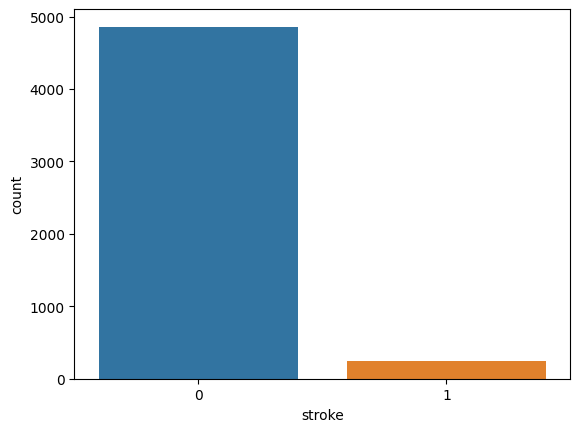

In [161]:
# Check the distribution of the target variable
sns.countplot(x="stroke", data=stroke_data)

### 5. Checked the distribution of the numerical variables (age, bmi, avg_glucose_level ) using a histogram plot


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

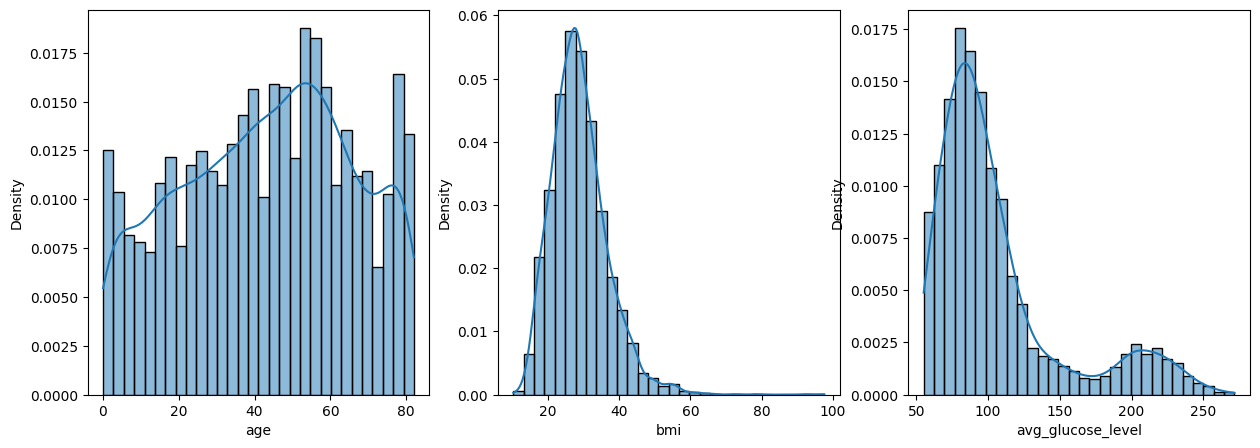

In [162]:
# Check the distribution of the numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.histplot(x="age", data=stroke_data, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1)
sns.histplot(x="bmi", data=stroke_data, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1)
sns.histplot(x="avg_glucose_level", data=stroke_data, bins=30, ax=axes[2], kde = True, stat = "density", linewidth=1)

### 6. Checked the distribution of the categorical variables using count plots


<Axes: xlabel='smoking_status', ylabel='count'>

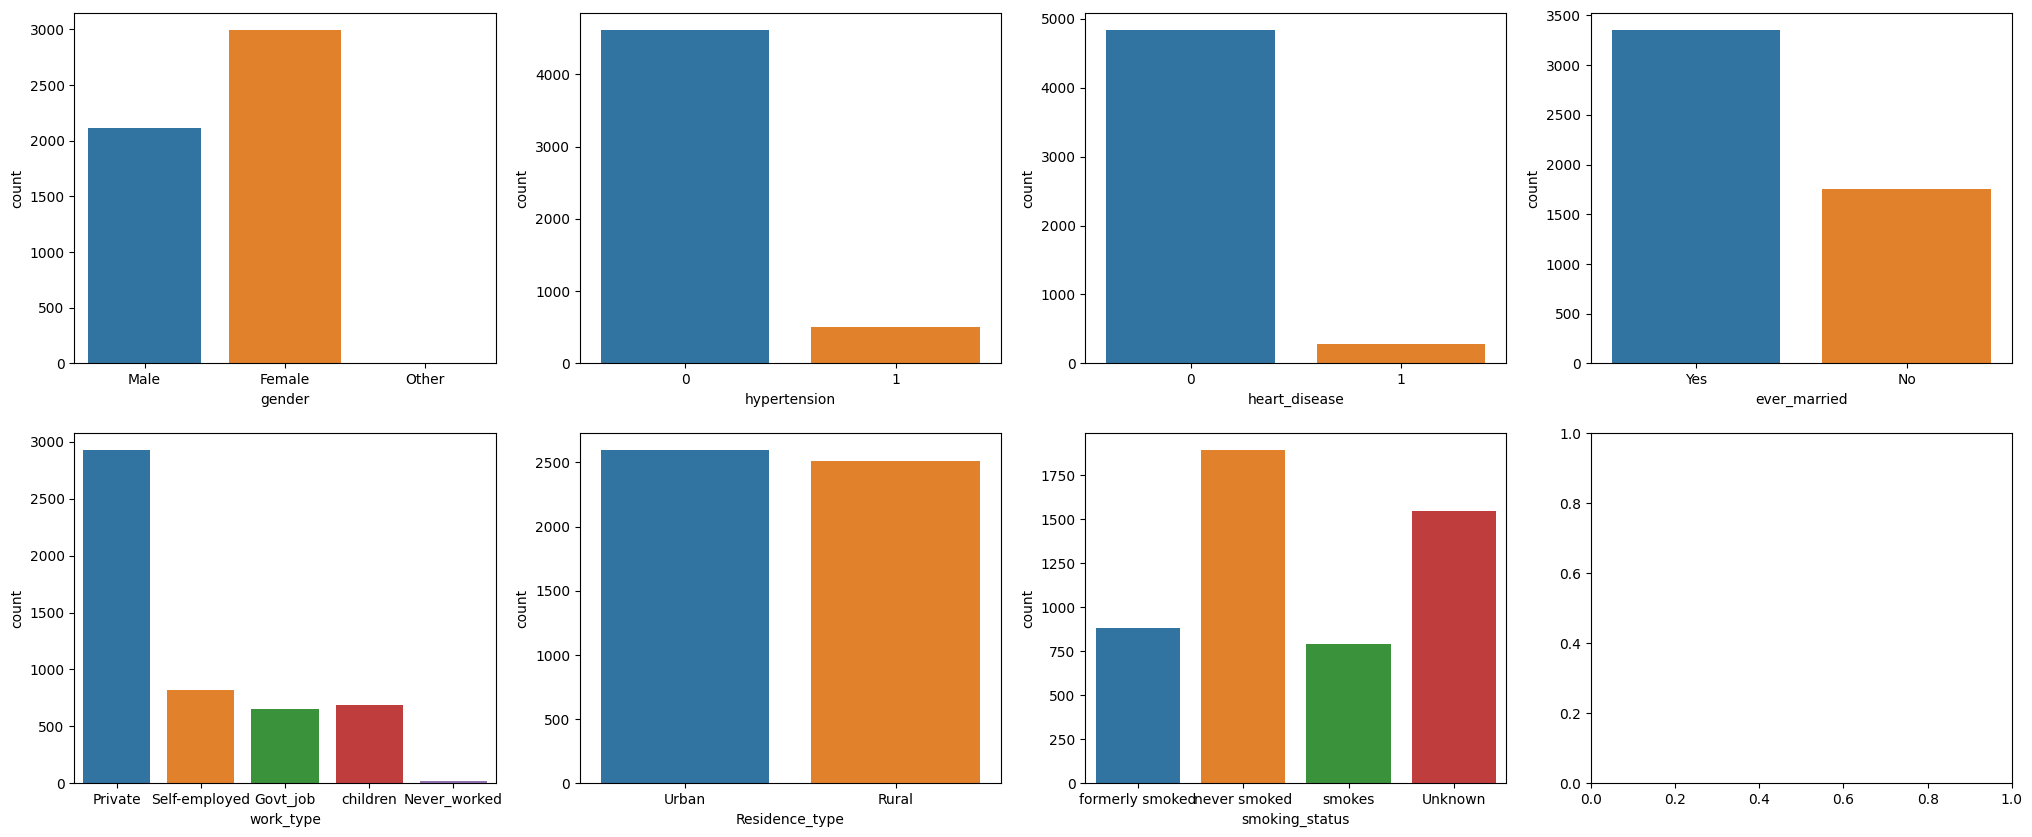

In [163]:
# Check the distribution of the categorical variables
fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharey=False)
sns.countplot(x="gender", data=stroke_data, ax=axes[0,0])
sns.countplot(x="hypertension", data=stroke_data, ax=axes[0,1])
sns.countplot(x="heart_disease", data=stroke_data, ax=axes[0,2])
sns.countplot(x="ever_married", data=stroke_data, ax=axes[0,3])
sns.countplot(x="work_type", data=stroke_data, ax=axes[1,0])
sns.countplot(x="Residence_type", data=stroke_data, ax=axes[1,1])
sns.countplot(x="smoking_status", data=stroke_data, ax=axes[1,2])

### 7. Checked the missing values in the dataset

In [164]:
# Check for missing values
print(stroke_data.isnull().sum())

# Check the stroke status where the bmi is missing
print("#stroke when bmi missing:\n ",stroke_data[stroke_data['bmi'].isnull()]['stroke'].value_counts())

# select smoker status equals to Unknown and calculate the number of rows
print("#smoking unknown:\n ", stroke_data[stroke_data['smoking_status'] == 'Unknown'].shape[0])

# Check the stroke status where smoker status equals to Unknown 
print("#stroke when smoking unknown:\n ",stroke_data[stroke_data['smoking_status'] == 'Unknown']['stroke'].value_counts())


# Check the stroke status where gender equals to Other
print("#stroke when gender equals to other:\n ",stroke_data[stroke_data['gender'] == 'Other']['stroke'].value_counts())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
#stroke when bmi missing:
  stroke
0    161
1     40
Name: count, dtype: int64
#smoking unknown:
  1544
#stroke when smoking unknown:
  stroke
0    1497
1      47
Name: count, dtype: int64
#stroke when gender equals to other:
  stroke
0    1
Name: count, dtype: int64


### Summary of features in the stroke dataset:

This EDA helped us gain a better understanding of the dataset and identify potential issues with missing values, class imbalance, and feature correlation. We also gained insights into which features may be useful for predicting stroke risk, which can guide our decisions for data preprocessing, feature selection, and model training in future steps of the analysis. We just did simple EDA to get a general idea of the dataset but avoided any in-depth analysis of the relationship between the features and the target variable, which may lead to data snooping bias.

Here is a summary of the features in the stroke dataset:

- `id`: Unique identifier for each row
- `gender`: "Male", "Female" or "Other". **Other only has one instance.**
- `age`: Age of the patient.    **May Normally distributed**
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.  **Imbalanced**
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.  **Imbalanced**
- `ever_married`: "No" or "Yes".  **Imbalanced**
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".  **Imbalanced**
- `Residence_type`: "Rural" or "Urban".   
- `avg_glucose_level`: Average glucose level in blood.**Bimodal distribution**
- `bmi`: Body mass index.    **Has missing values. May need to impute the missing values or drop the rows with missing values. Skewed normal distribution**
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown".   **Has missing values. "Unknown" in smoking_status means that the information is unavailable or missing. Imbalanced**
- `stroke`: 1 if the patient had a stroke or 0 if not.  **Imbalanced**


`Note`: The dataset has a mix of numerical and categorical features. We may need to encode the categorical features to numerical values to use them in machine learning models.


## Data Preprocess

In this step, we performed the following data preprocessing steps:

### 1.Splitting the data into training and testing sets

We first drope the `id` column since it is not useful for modeling. We also dropped the `gender = Other` since it only has one instance. A machine learning model could struggle to generalize from a category that has only one instance. 

Next, We split the data into training and testing sets using a 80/20 split. We used stratification to ensure that the class distribution is preserved in both the training and testing sets. We used a random state of 42 to ensure that the results are reproducible. We also used the stratify parameter to ensure that the class distribution is preserved in both the training and testing sets.

 We kept the testing set untouched to avoid data leakage.

In [165]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [166]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [167]:
# Re-Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("../../data/stroke/healthcare-dataset-stroke-data.csv")

# Drop the id column
stroke_data.drop('id', axis=1, inplace=True)

# Drop the gender = Other row
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace=True)

# Split the dataset into features and target variable
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


### 2. Handling missing values

We observed that the BMI column has some missing values. There are different strategies to handle missing values, including imputation or deletion. **In this case, we could impute the missing values using mean BMI value** since it is normally distributed. We did not choose deletion because dropping data is not always the best strategy since it may lead to a loss of information, especially if the missing values are a small fraction of the dataset. In the case of the stroke dataset, dropping the missing BMI values would mean losing around 4% of the data. Since this is a relatively small fraction of the data, it may be better to impute the missing values instead of dropping them. In addition, the stroke target is imbalanced, dropping the missing value will lose many postive values.

 **For categorical feature "smoking_status", we keeped the missing values "Unknown"** to preserve the missing values as a separate category which did not not bias the analysis towards any specific value. 
 
 We imputed missing values in the training set, and apply the same transformations to the test set.

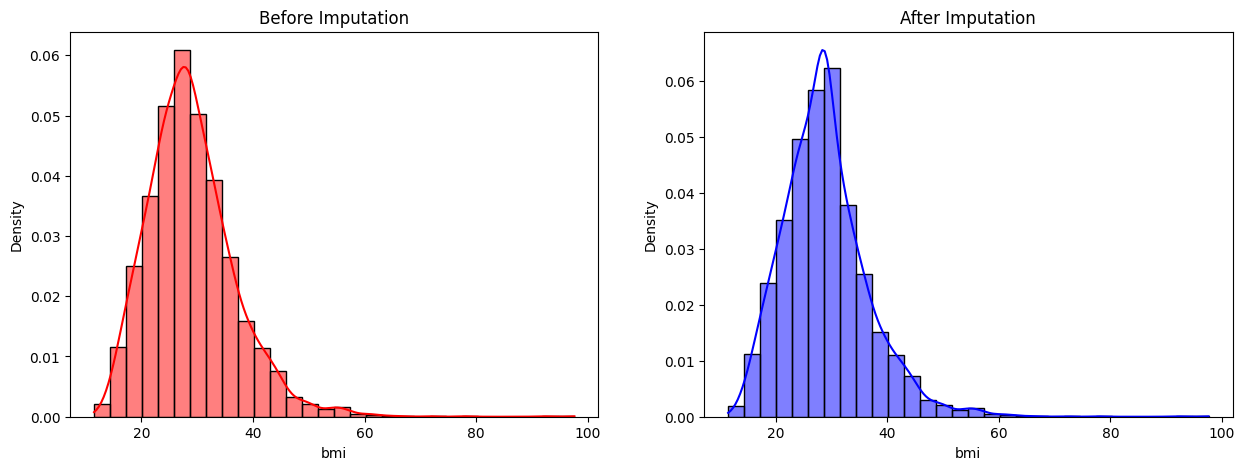

In [168]:
# Handle missing values in the BMI column
imputer = SimpleImputer(strategy="mean")

# Let's make a copy of the original dataset for visualization purposes
X_train_viz = X_train.copy()

# Fit the imputer on the training data
X_train['bmi'] = imputer.fit_transform(X_train[['bmi']])

# Check the distribution of the BMI column in training set after imputation
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.histplot(x="bmi", data=X_train_viz, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Imputation")
sns.histplot(x="bmi", data=X_train, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Imputation")

# Transform the test data
X_test['bmi'] = imputer.transform(X_test[['bmi']])

### 3. Encoding categorical variables

 Many machine learning algorithms cannot handle categorical variables directly, so we need to encode them as numerical values. **In this case, we used label encoding** to assign a unique integer value to each category. 

In [169]:
# Encode categorical variables using LabelEncoder
# Define a function to encode categorical variables using LabelEncoder
def label_encode(column):
    le = LabelEncoder()
    # Fit the encoder on the training data
    X_train[column] = le.fit_transform(X_train[column])
    # Transform the test data
    X_test[column] = le.transform(X_test[column])
    # Print the encoded values
    print(f"Encoded values for {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encode categorical variables using LabelEncoder
label_encode("gender")
label_encode("ever_married")
label_encode("work_type")
label_encode("Residence_type")
label_encode("smoking_status")

Encoded values for gender: {'Female': 0, 'Male': 1}
Encoded values for ever_married: {'No': 0, 'Yes': 1}
Encoded values for work_type: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Encoded values for Residence_type: {'Rural': 0, 'Urban': 1}
Encoded values for smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


### 4. Feature scaling: 

**In this case, we scaled numeric features to have a mean of 0 and a standard deviation of 1.** StandardScaler is a popular choice for feature scaling because it preserves the shape of the original distribution while centering the data and making it more interpretable for machine learning algorithms.

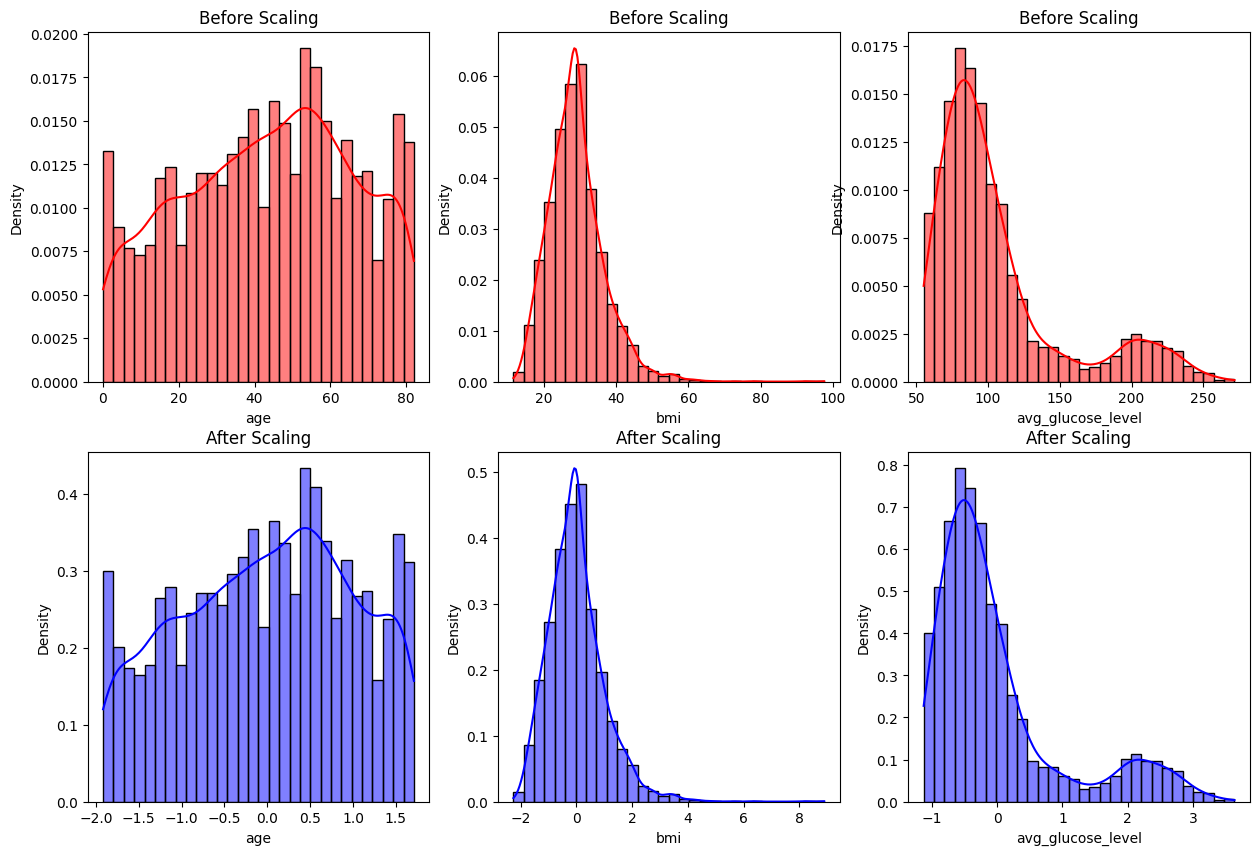

In [170]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
# Let's make a copy of the dataset before scaling for visualization purposes
X_train_viz = X_train.copy()

# numerical columns
numerical_columns = ["age", "bmi", "avg_glucose_level"] 

# Fit the scaler on the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


# Check the distribution after scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)
sns.histplot(x="age", data=X_train_viz, bins=30, ax=axes[0,0], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="bmi", data=X_train_viz, bins=30, ax=axes[0,1], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="avg_glucose_level", data=X_train_viz, bins=30, ax=axes[0,2], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="age", data=X_train, bins=30, ax=axes[1,0], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")
sns.histplot(x="bmi", data=X_train, bins=30, ax=axes[1,1], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")
sns.histplot(x="avg_glucose_level", data=X_train, bins=30, ax=axes[1,2], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")

# Transform the test data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### 5. Feature selection

We first check the relationship between the features and the target variable in the training data and the correlation between the features.

In [171]:
# Combine the data and target to analyse the relation between features and target
train_data = pd.concat([X_train, y_train], axis=1)

<Axes: xlabel='stroke', ylabel='count'>

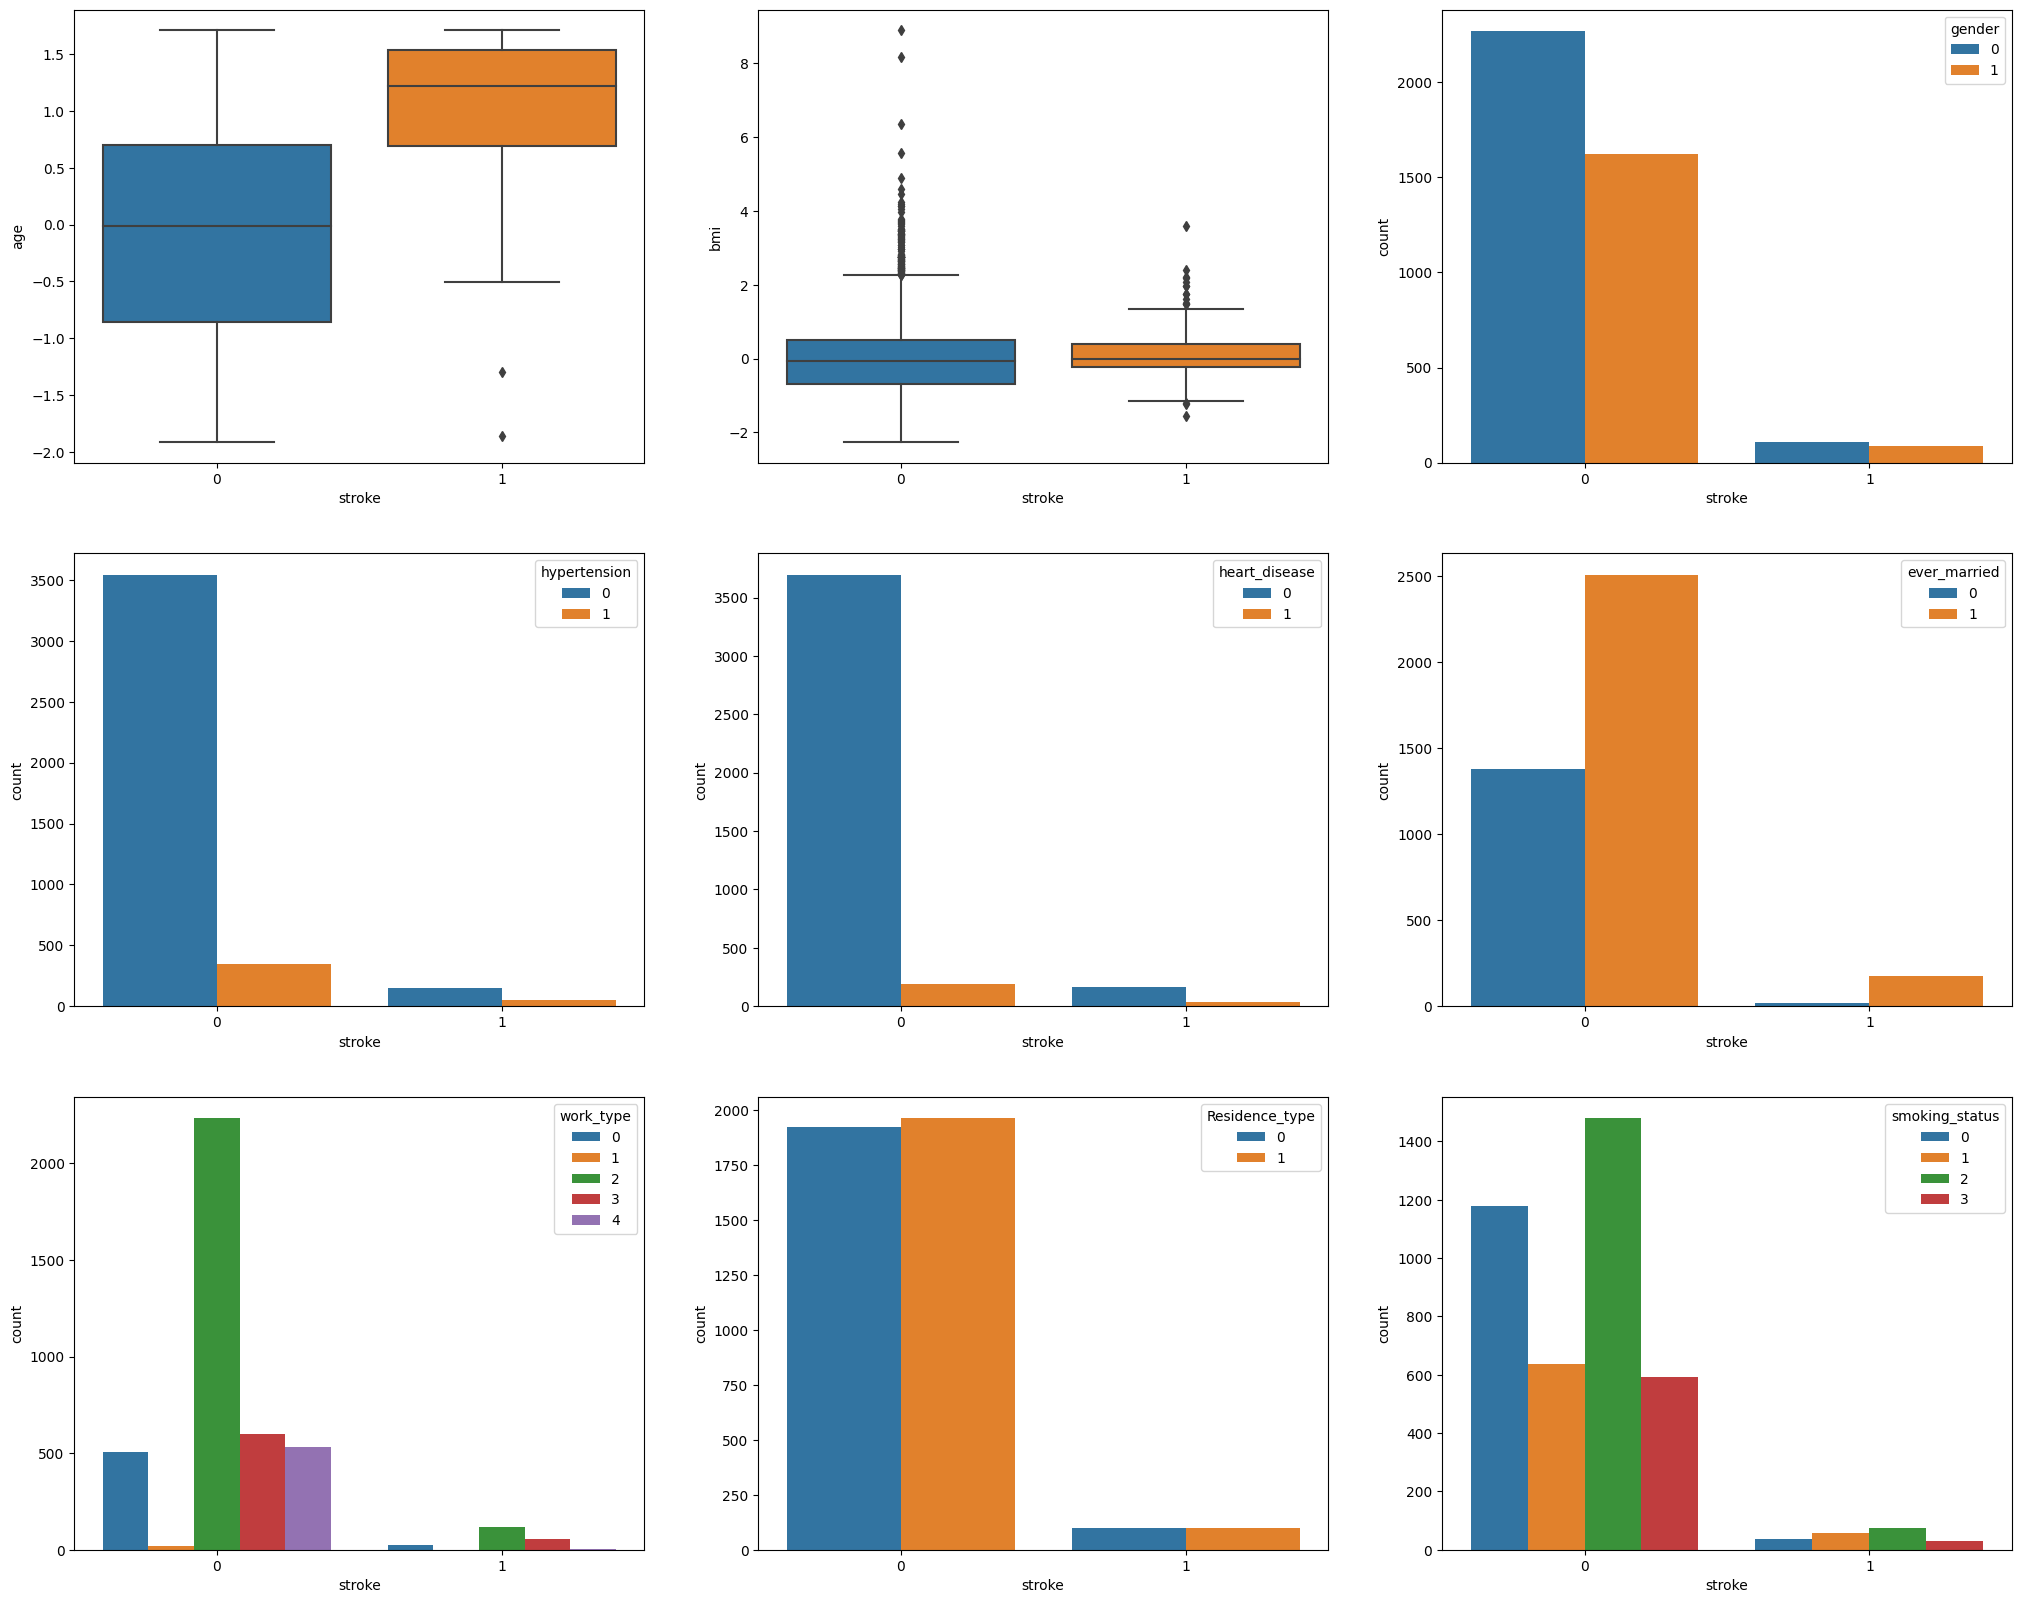

In [172]:
# Check the relationship between the features and the target variable
fig, axes = plt.subplots(3, 3, figsize=(25, 20), sharey=False)
sns.boxplot(x="stroke", y="age", data=train_data, ax=axes[0,0])
sns.boxplot(x="stroke", y="bmi", data=train_data, ax=axes[0,1])
sns.countplot(x="stroke", hue="gender", data=train_data, ax=axes[0,2])
sns.countplot(x="stroke", hue="hypertension", data=train_data, ax=axes[1,0])
sns.countplot(x="stroke", hue="heart_disease", data=train_data, ax=axes[1,1])
sns.countplot(x="stroke", hue="ever_married", data=train_data, ax=axes[1,2])
sns.countplot(x="stroke", hue="work_type", data=train_data, ax=axes[2,0])
sns.countplot(x="stroke", hue="Residence_type", data=train_data, ax=axes[2,1])
sns.countplot(x="stroke", hue="smoking_status", data=train_data, ax=axes[2,2])

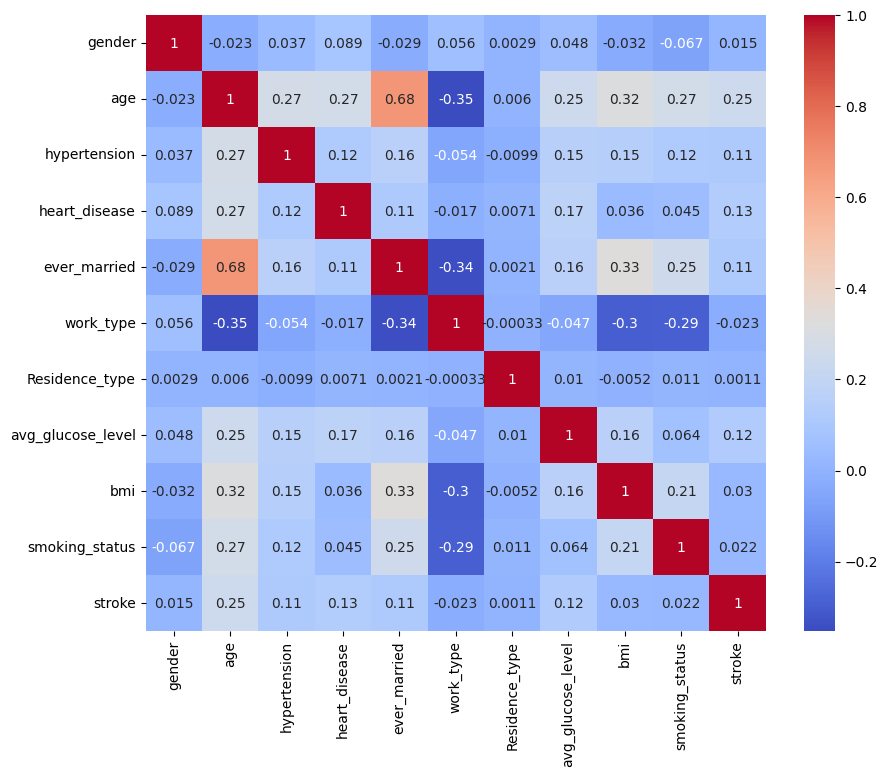

In [173]:
# Check the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()

Stroke is more common in older individuals, those with higher BMI, those with hypertension or heart disease, and those who have ever been married. Additionally, there were some differences in stroke rates based on gender, work type, residence type, and smoking status. There is a positive correlation between age and hypertension and heart disease, which may be useful in predicting stroke risk. 

Therefore, we performed feature selection to identify the most important features for predicting stroke risk. We used the `SelectKBest` method from the scikit-learn library to select the top 5 features based on `ANOVA F-value between label/feature for classification` tasks scores. 

In [174]:
# Select the top 5 most important features using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=5)
# Fit the selector on the training data
selector.fit(X_train, y_train)

# Print the names of the most important features
selected_columns = selector.get_support(indices=True)
selected_features = X_train.columns[selected_columns].tolist()
print("selected features: ", selected_features )


selected features:  ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level']


### 6.Handling imbalanced target variable: 

Since the target variable (stroke) is imbalanced, we need to address this issue by either oversampling the minority class (positive stroke diagnosis) or undersampling the majority class (negative stroke diagnosis). There are different methods to achieve this, such as random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or random undersampling. **In this example, we used the random SMOTE method from the imbalanced-learn library to oversample the minority class.** This method generates synthetic samples for the minority class in a multidimensional feature space, providing a more diverse set of examples for the model to learn from, rather than just duplicating existing examples like in random oversampling. We applied SMOTE to the training set only to avoid data leakage.

In [175]:
# Handle imbalanced target variable using SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Check the shape of X_resampled and y_resampled
print("Shape of X_resampled: ", X_resampled.shape)
print("Shape of y_resampled: ", y_resampled.shape)

Shape of X_resampled:  (7776, 10)
Shape of y_resampled:  (7776,)


## Machine Learning Model

We selected below machine learning models to predict stroke risk:

| Algorithm | Pros | Cons |
| --------- | ---- | ---- |
| Perceptron | Fast training time, simple implementation | May not converge, requires linearly separable data |
| Logistic Regression | Probabilistic interpretation, handles non-linearities through feature engineering | Sensitive to outliers, may overfit |
| Decision Tree | Easy to interpret, handles both categorical and numerical data | Prone to overfitting, unstable with small variations in data |
| Random Forest | Robust to outliers, handles high dimensional data well | Slow for large datasets, harder to interpret |
| AdaBoost | Flexible and can handle non-linearities, works well with weak learners | Sensitive to noisy data, can overfit |
| Support Vector Machine | Handles non-linear data well, can work with high dimensional data | Slower training time for large datasets, can be sensitive to choice of kernel |
| K-Nearest Neighbors | Simple implementation, good for small datasets | Sensitive to choice of distance metric, computationally expensive for large datasets |
| MLPClassifier | Handles complex data, can learn non-linear decision boundaries | Requires large amounts of data, prone to overfitting |
| Gaussian Naive Bayes | Fast training time, handles categorical and numerical data well | Assumes independence between features, can suffer from zero-frequency problem |

In [176]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

### Use preprocessed data with `all features` to construct machine learning models

In [177]:
# Use SMOTE resampled data to train the models


# Define a function to train and evaluate the models
def train_eval_model(classifier, X_train, y_train, X_test, y_test):
    # Train the model
    classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    # Print the evaluation metrics for the model
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("AUC: ", auc.round(3))
    


In [178]:
# Perceptron
train_eval_model(Perceptron(random_state=42,max_iter=1000, tol=1e-3), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.63      0.77       972
           1       0.10      0.76      0.17        50

    accuracy                           0.64      1022
   macro avg       0.54      0.70      0.47      1022
weighted avg       0.94      0.64      0.74      1022

AUC:  0.697


In [179]:
# Logistic Regression
train_eval_model(LogisticRegression(random_state=42, max_iter=1000), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.97      0.76      0.85       972
           1       0.11      0.58      0.18        50

    accuracy                           0.75      1022
   macro avg       0.54      0.67      0.52      1022
weighted avg       0.93      0.75      0.82      1022

AUC:  0.669


In [180]:
# Decision Tree
train_eval_model(DecisionTreeClassifier(random_state=42), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.11      0.26      0.15        50

    accuracy                           0.86      1022
   macro avg       0.53      0.58      0.54      1022
weighted avg       0.92      0.86      0.89      1022

AUC:  0.575


In [181]:
# Random Forest
train_eval_model(RandomForestClassifier(random_state=42, n_estimators=100), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.13      0.24      0.17        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022

AUC:  0.578


In [182]:
# AdaBoost
train_eval_model(AdaBoostClassifier(random_state=42, n_estimators=100), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.11      0.50      0.18        50

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.93      0.78      0.84      1022

AUC:  0.646


In [183]:
# Support Vector Machine
train_eval_model(SVC(random_state=42), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.97      0.78      0.86       972
           1       0.11      0.56      0.19        50

    accuracy                           0.77      1022
   macro avg       0.54      0.67      0.53      1022
weighted avg       0.93      0.77      0.83      1022

AUC:  0.668


In [184]:

# KNeighborsClassifier
train_eval_model(KNeighborsClassifier(n_neighbors=4, weights="distance"), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.84      0.90       972
           1       0.12      0.40      0.18        50

    accuracy                           0.82      1022
   macro avg       0.54      0.62      0.54      1022
weighted avg       0.92      0.82      0.86      1022

AUC:  0.622


In [185]:
# MLPClassifier
train_eval_model(MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10)), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.12      0.48      0.20        50

    accuracy                           0.81      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.93      0.81      0.86      1022

AUC:  0.654


In [186]:
# Gaussian Naive Bayes
train_eval_model(GaussianNB(), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.12      0.76      0.20        50

    accuracy                           0.70      1022
   macro avg       0.55      0.73      0.51      1022
weighted avg       0.94      0.70      0.79      1022

AUC:  0.73


### Use preprocessed data with `five selected features` to construct machine learning models

In [187]:
# Use five selected features to train the models
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Show the shape of the training, validation and test sets
print("Features: ", X_resampled_selected.columns)


Features:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


In [188]:
# Perceptron
train_eval_model(Perceptron(random_state=42,max_iter=1000, tol=1e-3), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.93      0.74      0.81      1022

AUC:  0.702


In [189]:
# Logistic Regression
train_eval_model(LogisticRegression(random_state=42, max_iter=1000), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.75      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.75      0.82      1022

AUC:  0.705


In [190]:
# Decision Tree
train_eval_model(DecisionTreeClassifier(random_state=42), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       972
           1       0.07      0.12      0.09        50

    accuracy                           0.88      1022
   macro avg       0.51      0.52      0.51      1022
weighted avg       0.91      0.88      0.90      1022

AUC:  0.52


In [191]:
# Random Forest
train_eval_model(RandomForestClassifier(random_state=42, n_estimators=100), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       972
           1       0.08      0.18      0.11        50

    accuracy                           0.85      1022
   macro avg       0.52      0.53      0.51      1022
weighted avg       0.91      0.85      0.88      1022

AUC:  0.534


In [192]:
# AdaBoost
train_eval_model(AdaBoostClassifier(random_state=42, n_estimators=100), X_resampled_selected, y_resampled, X_test_selected, y_test)


              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.11      0.64      0.19        50

    accuracy                           0.74      1022
   macro avg       0.54      0.69      0.52      1022
weighted avg       0.93      0.74      0.81      1022

AUC:  0.69


In [193]:
# Support Vector Machine
train_eval_model(SVC(random_state=42), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.12      0.68      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.71      0.52      1022
weighted avg       0.94      0.74      0.81      1022

AUC:  0.709


In [194]:
# KNeighborsClassifier
train_eval_model(KNeighborsClassifier(n_neighbors=4, weights="distance"), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       972
           1       0.09      0.40      0.15        50

    accuracy                           0.77      1022
   macro avg       0.53      0.60      0.51      1022
weighted avg       0.92      0.77      0.83      1022

AUC:  0.596


In [195]:
# MLPClassifier
train_eval_model(MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10)), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.64      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.69      0.52      1022
weighted avg       0.93      0.74      0.81      1022

AUC:  0.693


In [196]:
# Gaussian Naive Bayes
train_eval_model(GaussianNB(), X_resampled_selected, y_resampled, X_test_selected, y_test)


              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.80      0.21        50

    accuracy                           0.70      1022
   macro avg       0.55      0.75      0.51      1022
weighted avg       0.94      0.70      0.79      1022

AUC:  0.748


## Conclusion

### Results
Here is the summary of the accuracy scores for each model:

| Algorithm | Accuracy (All Features) | Accuracy (Five Features) | AUC (All Features) | AUC (Five Features) | 
| --------- | ---- | ---- | ---- | ---- |
| Perceptron | 0.64 | 0.74 | 0.697 | 0.702 |
| Logistic Regression | 0.75 | 0.75 | 0.669 | 0.705 |
| Decision Tree | 0.86 | 0.88 | 0.575 | 0.520 |
| Random Forest | 0.88 | 0.85 | 0.578 | 0.534 |
| AdaBoost | 0.78 | 0.74 | 0.646 | 0.69 |
| Support Vector Machine | 0.77 | 0.74 | 0.668 | 0.709 |
| K-Nearest Neighbors | 0.82 | 0.77 | 0.622 | 0.596 |
| MLPClassifier | 0.81 | 0.74 | 0.654 | 0.693 |
| Gaussian Naive Bayes | 0.70 | 0.70 | 0.730 | 0.748 |

Note:

All Features are: 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age', 'bmi', 'avg_glucose_level'.

Five Selected Features are: 'hypertension', 'heart_disease', 'ever_married', 'age', 'avg_glucose_level'.

### Conclusion based on the models and results in this study:
From the table, we can see that the Random Forest algorithm has the highest accuracy score with all features, and the Decision Tree algorithm has the highest accuracy score with the subset of five features. However, when comparing the algorithms using AUC, we see that the Support Vector Machine algorithm performs the best with both all features and the subset of five features. The reason for this discrepancy is that accuracy is not a good metric for imbalanced datasets, since it does not take into account the true negatives. Since the target variable in this dataset is imbalanced, we should use AUC to evaluate model performance instead of accuracy. 

When comparing the same algorithm using all features and the subset of five features, we see that most algorithms perform better with all features. This indicates that the full set of features provides more information for predicting stroke than the subset of five features. However, some algorithms, such as Decision Tree and Random Forest, show higher accuracy scores with the subset of five features. This may suggest that these algorithms are more sensitive to the subset of features used, and may benefit from feature selection or dimensionality reduction techniques to improve performance.

### Future work

This practice aimed to perform exploratory data analysis, compare various machine learning models to predict stroke risk, and evaluate their performance using all features and selected features. However, there are many other things that could be explored to improve model performance, such as:

. There are many other things that could be explored to improve model performance, such as:
1. `Explore different preprocessing methods`: Although we used some common methods for handling missing values, encoding categorical variables, and scaling features, it may be worth exploring other options to see if they improve model performance. For example, we could try using other imputation methods besides mean imputation, or use one-hot encoding instead of label encoding for categorical variables.

2. `Experiment with different sampling techniques`: While SMOTE is a effective method for handling imbalanced datasets, other techniques such as random sampling or ADASYN could also be explored to see if they improve model performance.

3. `Try different feature selection techniques`: In this study, we used Univariate feature selection with the f_classif score function. However, there are many other feature selection techniques available such as Recursive Feature Elimination, Principal Component Analysis, or SelectFromModel. It may be worth trying out some of these other methods to see if they yield better results.

4. `Include more domain knowledge:` While our study focused on using machine learning algorithms to predict stroke diagnosis, it may be helpful to incorporate more domain knowledge into the analysis. This could involve consulting with medical professionals to identify additional relevant features or exploring different ways of defining the target variable.

5. `Experiment with different models`: While we tested several machine learning algorithms in this study, there are many other models that could be explored. It may be worth trying out models such as Gradient Boosting or XGBoost to see if they improve performance. Additionally, ensemble methods such as Stacking or Voting could be experimented with to see if they improve accuracy.

6. `Explore different hyperparameters for each model`: Hyperparameters are settings that are not learned from the data but are set before the learning process begins, such as the learning rate, regularization strength, or maximum depth of a decision tree. In this study, we used default hyperparameters for most models. However, we can try different hyperparameter values for each model to see if we can further improve their performance. For example, for Random Forest, we could try changing the number of estimators, maximum depth, or minimum samples per leaf. For SVM, we could try different kernels, regularization strengths, or gamma values. For MLPClassifier, we could try different hidden layer sizes, activation functions, or learning rates.

